<a href="https://colab.research.google.com/github/Ashi743/my_projects-/blob/main/titanic_pipeline_and_trf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

house-train.csv and train (2).csv  for random sample imputation practices

In [4]:
house_train=pd.read_csv('/content/house-train.csv')
titanic= pd.read_csv('/content/train (2).csv')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1= titanic[['Age','Fare','Survived']].copy()

In [7]:
df1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [8]:
df1.isnull().mean()*100   #refer kde

,0
Age,19.86532
Fare,0.00000
Survived,0.00000


In [14]:
from sklearn.model_selection import train_test_split
X= df1.drop('Survived', axis=1)
Y= df1['Survived']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [21]:
#column_trf --> pipeline --> clf
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df2= titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]].copy()

Skewness-Age: 0.39


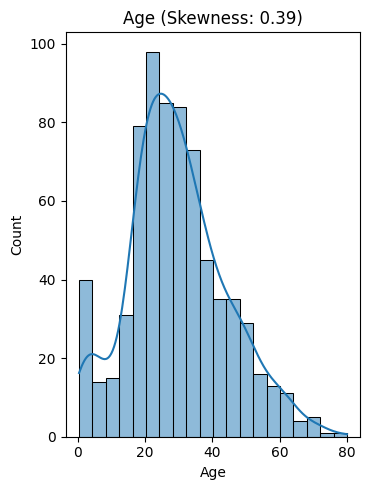

In [81]:
#kdeplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_distributions(df, columns, titles, nrows=1, ncols=3, figsize=(10, 5)):
    """
    Plots the distributions of specified columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - columns: List of column names to plot.
    - titles: List of titles for each subplot.
    - nrows: Number of rows in the subplot grid.
    - ncols: Number of columns in the subplot grid.
    - figsize: Size of the figure.
    """
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # Ensure ax is always a 1D array, even if there is only one subplot
    if nrows * ncols == 1:
        ax = [ax]
    else:
        ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=ax[i])
        ax[i].set_title(titles[i])

        # Check if the column is numeric before calculating skewness
        if pd.api.types.is_numeric_dtype(df[col]):
            skewness = df[col].skew()
            print(f"Skewness-{col}: {skewness:.2f}")
            ax[i].set_title(f"{titles[i]} (Skewness: {skewness:.2f})")
        else:
            print(f"Column '{col}' is not numeric, skipping skewness calculation.")

    # Delete any unused subplots
    for i in range(len(columns), nrows * ncols):
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()

plot_distributions(df1, columns=['Age'], titles=['Age'])


In [20]:
#missing value imputation
#remove duplicates
#skewness via. outlier ,transformation,

#label encoded survived, ohe on pclass, sex, embarked
#feat_constt.= sibsp +parch
#binning on fare and age  new column ( may increase accuracy )

#NO FEAT_SELECTION already 7 X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [22]:
#missing value
df2.isnull().mean()*100

,0
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Embarked,0.224467
Survived,0.000000


In [60]:
#Series --> DataFrame
df_age_temp= df2["Age"]
df_fare_temp= df2["Fare"]
df_embarked_temp= df2["Embarked"]
type(df_age_temp)
df_age_temp= pd.DataFrame(df_age_temp)
df_fare_temp= pd.DataFrame(df_fare_temp)
df_embarked_temp= pd.DataFrame(df_embarked_temp)
type(df_age_temp)

pandas.core.frame.DataFrame

In [89]:
df_age_temp["Age_mean"] = df_age_temp["Age"].fillna(df_age_temp["Age"].mean())
df_fare_temp["Fare_mean"] = df_fare_temp["Fare"].fillna(df_fare_temp["Fare"].mean())
df_embarked_temp["Embarked_mode"] = df_embarked_temp["Embarked"].fillna(df_embarked_temp["Embarked"].mode()[0])

print(df_age_temp.isnull().mean()*100)
print(df_fare_temp.isnull().mean()*100)
print(df_embarked_temp.isnull().mean()*100)

Age         19.86532
Age_mean     0.00000
dtype: float64
Fare         0.0
Fare_mean    0.0
dtype: float64
Embarked         0.224467
Embarked_mode    0.000000
dtype: float64


In [84]:
df_embarked_temp.drop(columns= ["Embarked_mean"], inplace= True)

Skewness-Age: 0.39
Skewness-Age_mean: 0.43


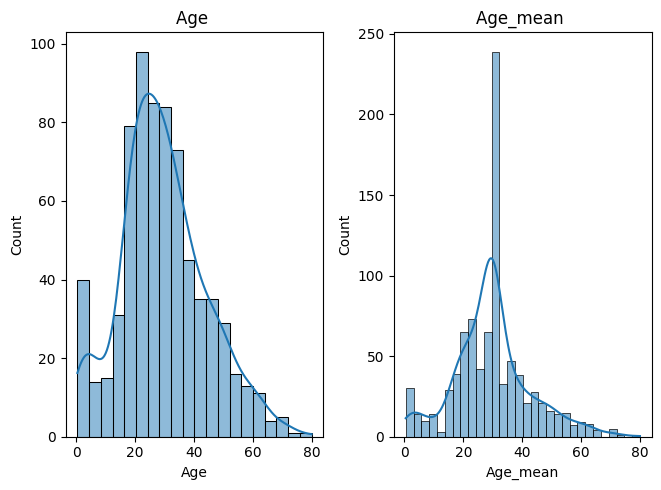

Skewness: 0.43


In [78]:
plot_distributions(df_age_temp, columns=['Age', 'Age_mean'], titles=['Age', 'Age_mean'])

Skewness-Fare: 4.79
Skewness-Fare_mean: 4.79


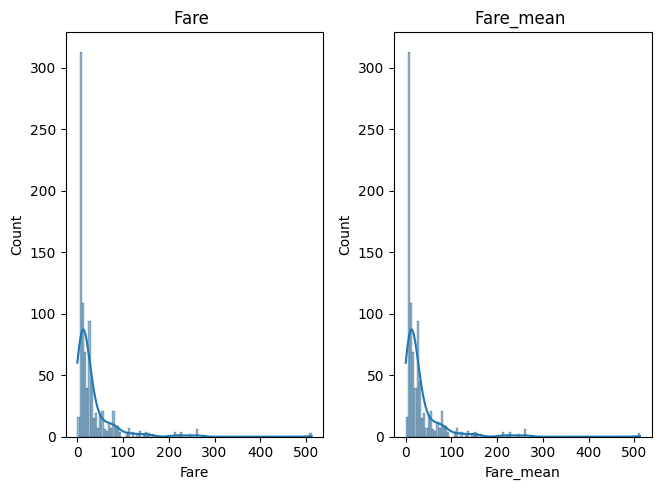

Skewness: 4.79


In [79]:
plot_distributions(df_fare_temp, columns=['Fare', 'Fare_mean'], titles=['Fare', 'Fare_mean'])

Column 'Embarked' is not numeric, skipping skewness calculation.
Column 'Embarked_mode' is not numeric, skipping skewness calculation.


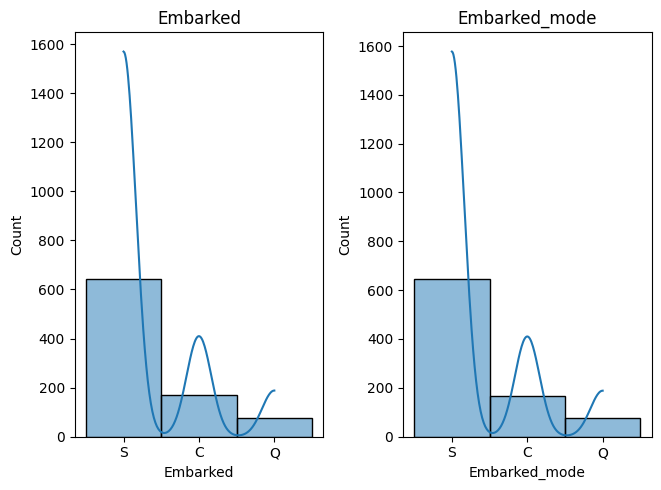

In [88]:
plot_distributions(df_embarked_temp, columns=['Embarked', 'Embarked_mode'], titles=['Embarked', 'Embarked_mode'])

pre and post kdeplots are almost same so we can initiate pipelines.

In [151]:
import pandas as pd
import numpy as np

class OutlierRemover:
    def __init__(self, method='IQR', factor=1.5):
        self.method = method
        self.factor = factor

    def fit(self, X):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        self.columns = X.columns
        self.bounds = {}

        for column in self.columns:
            data = X[column]
            if self.method == 'IQR':
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - self.factor * IQR
                upper_bound = Q3 + self.factor * IQR
                self.bounds[column] = (lower_bound, upper_bound)
            elif self.method == 'Z-score':
                mean = data.mean()
                std_dev = data.std()
                self.bounds[column] = (mean - self.factor * std_dev, mean + self.factor * std_dev)
            elif self.method == 'Percentile':
                lower_bound = data.quantile(0.01)
                upper_bound = data.quantile(0.99)
                self.bounds[column] = (lower_bound, upper_bound)
            else:
                raise ValueError("Method should be 'IQR' or 'Z-score', or 'percentile'")

    def transform(self, X):
        """
        Remove outliers from the data based on the fitted model.

        Parameters:
        - X: A pandas DataFrame or Series to transform.

        Returns:
        - A DataFrame with outliers removed.
        """
        if isinstance(X, pd.Series):
            X = X.to_frame()

        for column in self.columns:
            lower_bound, upper_bound = self.bounds[column]
            X = X[(X[column] >= lower_bound) & (X[column] <= upper_bound)]

        return X

    def fit_transform(self, X,y=None):
        """
        Fit the OutlierRemover on the data and then remove outliers.

        Parameters:
        - X: A pandas DataFrame or Series to fit and transform.

        Returns:
        - A DataFrame with outliers removed.
        """
        self.fit(X)
        return self.transform(X)


o = OutlierRemover(method='IQR')  # Choose the method as needed

# Apply fit_transform to the 'Age' column of df2
cleaned_age = o.fit_transform(df2["Age"])

print(cleaned_age)
type(cleaned_age)

      Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
..    ...
885  39.0
886  27.0
887  19.0
889  26.0
890  32.0

[703 rows x 1 columns]


pandas.core.frame.DataFrame

In [152]:
df2["Age"]= cleaned_age

In [153]:
df2.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Familysize
0,3,male,22.0,7.2500,S,0,2
1,1,female,38.0,71.2833,C,1,2
2,3,female,26.0,7.9250,S,1,1
3,1,female,35.0,53.1000,S,1,2
4,3,male,35.0,8.0500,S,0,1


Skewness-Age: 0.39


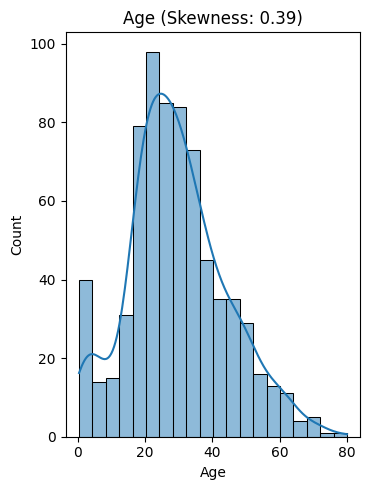

In [157]:
plot_distributions(titanic, columns=['Age'], titles=['Age'])

In [100]:
df2["Familysize"]= df2["SibSp"]+df2["Parch"]+1
df2.drop(columns= ["SibSp", "Parch"], inplace= True)
df2.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Familysize
0,3,male,22.0,7.2500,S,0,2
1,1,female,38.0,71.2833,C,1,2
2,3,female,26.0,7.9250,S,1,1
3,1,female,35.0,53.1000,S,1,2
4,3,male,35.0,8.0500,S,0,1


In [167]:

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression

# Define custom outlier removal class (ensure it's implemented correctly)
# from your_module import OutlierRemover
categorical_features= ["Pclass", "Sex", "Embarked"]
# Define transformers
transformer_age = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),
    ("yeo-johnson", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler())
])

transformer_fare = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),
    #("outlier", OutlierRemover()),  # Ensure this class is implemented correctly
    ("log", FunctionTransformer(np.log1p)),
    ("scaler", StandardScaler())
])

transformer_categorical = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Define ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("age", transformer_age, ['Age']),  # Ensure these are in list format
    ("fare", transformer_fare, ['Fare']),
    ("categorical", transformer_categorical, categorical_features)
])

# Create the pipeline with preprocessor and classifier
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

# Prepare the data
X = df2.drop('Survived', axis=1)
Y = df2['Survived']  # Ensure Y is a Series

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the pipeline
clf.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


In [165]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('yeo-johnson',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('fare',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])